In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [3]:
data= pd.read_csv('Loan_Data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data = data.dropna()
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
#Creating a list of numerical columns:
numerical = data.select_dtypes([np.number])
numerical.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [9]:
#The two columns ApplicantIncome and CoapplicantIncome give the same information i.e. income of applicants. 
#It would be better to have that information in one column only.
#Adding the applicant and co-applicant income to get the total income per application
data['total_income']=data['ApplicantIncome'] + data['CoapplicantIncome']

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [10]:
#Drop Loan_ID as it is an irrelevant attribute, it does not affect loan eligibility. 
data = data.drop('Loan_ID',axis=1)

In [11]:
#Dropping the columns as we created a new column which captures the same information
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

In [12]:
print(data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'total_income'],
      dtype='object')


In [13]:
#Creating a list of categirocal columns:
categoricals = data.select_dtypes(include=['object'])
categoricals

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [14]:
#Checking the percentage of each category for categorical variables
for col in categoricals:
    print(data[col].value_counts(normalize=True)) 
    print('*'*40)  
#About 65% of customers are married. This indicates that married people apply more for the loan as compared to non-married people.
#Only ~14% of customers are self-employed. This indicates that salaried people apply more for the loan.  

Male      0.820833
Female    0.179167
Name: Gender, dtype: float64
****************************************
Yes    0.647917
No     0.352083
Name: Married, dtype: float64
****************************************
0     0.570833
2     0.177083
1     0.166667
3+    0.085417
Name: Dependents, dtype: float64
****************************************
Graduate        0.797917
Not Graduate    0.202083
Name: Education, dtype: float64
****************************************
No     0.8625
Yes    0.1375
Name: Self_Employed, dtype: float64
****************************************
Semiurban    0.397917
Urban        0.312500
Rural        0.289583
Name: Property_Area, dtype: float64
****************************************
Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64
****************************************


# Analyse the relationship between a continuous feature and the categorical target variable

In [15]:
data.groupby('Loan_Status', as_index=False)['total_income', 'LoanAmount', 'Loan_Amount_Term'].mean()

,Loan_Status,total_income,LoanAmount,Loan_Amount_Term
0,N,7503.270270,153.378378,342.810811
1,Y,6696.602169,140.882530,341.710843


<AxesSubplot:xlabel='Loan_Status', ylabel='total_income'>

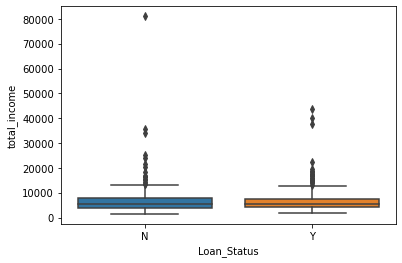

In [16]:
sns.boxplot(x=data.Loan_Status, y=data.total_income)

Except for some outliers, there is no major difference between the income of those customers who are eligible versus those who are not.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

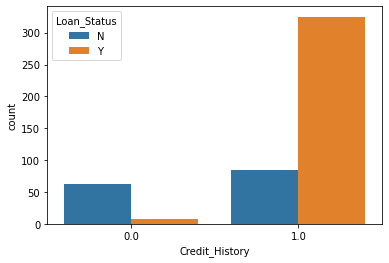

In [17]:
sns.countplot(x=data.Credit_History, hue=data.Loan_Status)

It shows that credit history is an important factor while checking customer's loan egibility, just a few customers got approved when their credit didn't meet the requirements. Let's check the relationship of numerical features

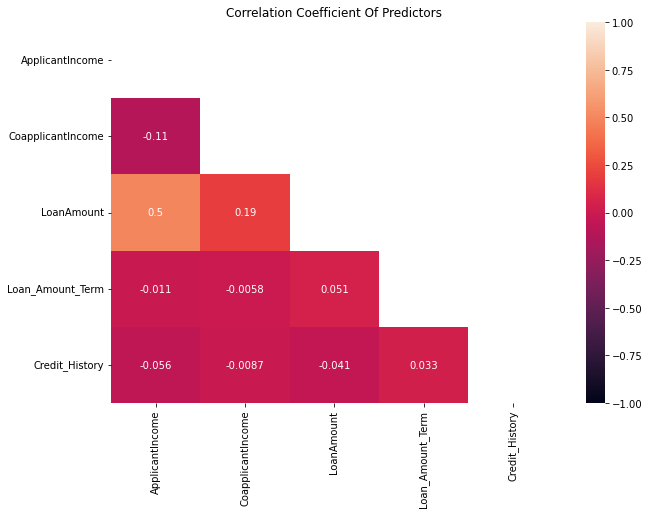

In [18]:
plt.figure(figsize=(10,7))


mask = np.triu(np.ones_like(numerical.corr(), dtype=bool))

# generate heatmap
sns.heatmap(numerical.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

#There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount
#This implies that the loan amount for higher-income applicants is progressively higher.

Using crosstab and stack plot to visualize the remaining categorical variables vs target variable.

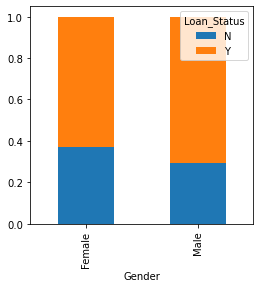

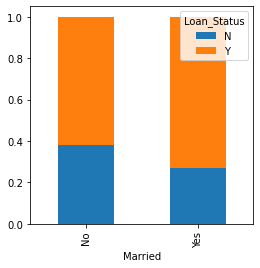

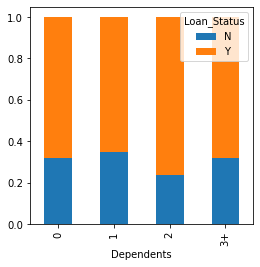

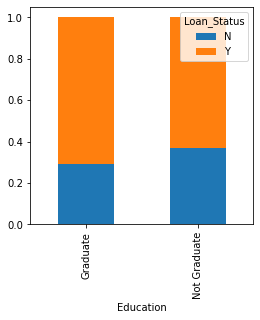

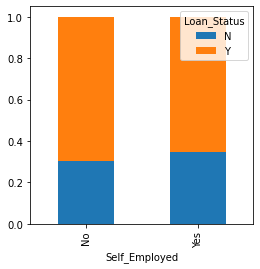

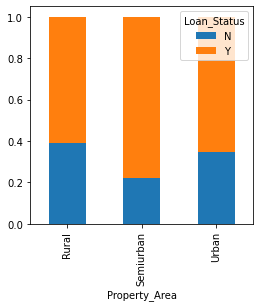

In [19]:
Gender= pd.crosstab(data['Gender'],data['Loan_Status'])
Married=pd.crosstab(data['Married'],data['Loan_Status'])
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status'])
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Property_Area = pd.crosstab(data['Property_Area'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [20]:
labelencoder = LabelEncoder()
for col in categoricals:
    categoricals[col] = labelencoder.fit_transform(categoricals[col])
categoricals

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
5,1,1,2,0,1,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [21]:
data = pd.concat([numerical, categoricals], axis=1)


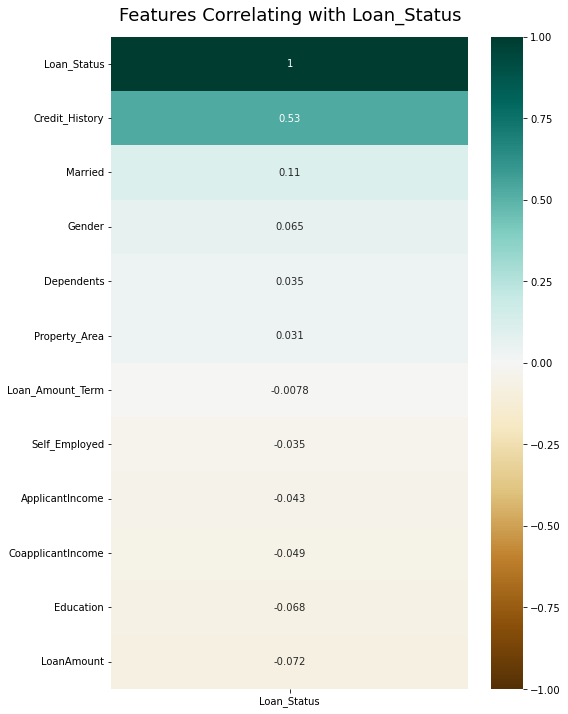

In [22]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['Loan_Status']].sort_values(by='Loan_Status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Loan_Status', fontdict={'fontsize':18}, pad=16);

In [23]:
#handling with the imbalance from the dataset
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values


In [24]:
r1=RandomOverSampler()
x_data,y_data=r1.fit_resample(x,y)

In [25]:
#Separating target variable and other variables
X=data.drop(columns='Loan_Status')
Y=data['Loan_Status']

In [26]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=7)

Since this is a binary classification problem, I will use logistic regression to predict the probability

In [27]:
classification = LogisticRegression(random_state=42) 

classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

Check the performance of the model The model can make wrong predictions in one of two ways:

- Predicting a customer is not eligible for a loan when the customer actually is eligible - Loss of opportunity
- Predicting a customer is eligible for a loan when the customer is actually not - Financial loss

Which case is more important? 
- Predicting that the customer is eligible when he is not, because the person might default or not be able to return the loan, which would result in financial loss to the bank.

In [28]:
predictions = classification.predict(X_train)
predictions
accuracy_score(y_train,predictions)
#So our predictions are more than 80% accurate,we have identified 80% of the loan status correctly.

0.8125

In [29]:
confusion_matrix(y_train, predictions)

array([[ 43,  55],
       [  8, 230]], dtype=int64)

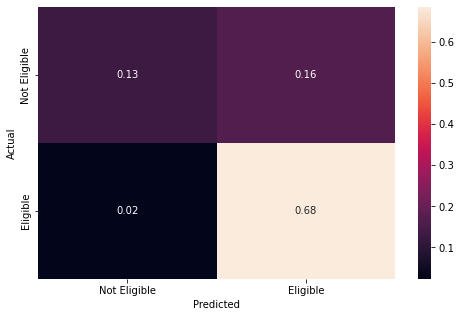

In [30]:
cf_matrix = confusion_matrix(y_train, predictions, normalize='all')
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
y_pred_train = classification.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.84      0.44      0.58        98
           1       0.81      0.97      0.88       238

    accuracy                           0.81       336
   macro avg       0.83      0.70      0.73       336
weighted avg       0.82      0.81      0.79       336



Here, the class of interest is 0 which identify non-eligible customers. So, the company wants to minimize the number of false negatives, in other words Recall is the evaluation criterion to be maximized. We can see the recall score is only 44% for class 0 which is low, considering we want to get a strong recall value for our specific problem. Thus, this model will not perform well for us.